# Homework 6: Convolutional Neural Networks
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, David Sondak

<hr style="height:2pt">

In [5]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- Please name your file name  as `HW2-Group#.ipynb` where `Group#` is your assigned group number.
- Send your completed Jupyter notebook to the course TF.
- This homework can be submitted in groups. Submit only one per group.
- There are some specific instructions for each problem.  Make sure you carefully read them.

**Names of the people in your group:**
* 
* 
* 
<br><br>

## Problem 1: Convolutional Neural Network Basics

In convolutional neural networks, a convolution is a multiplicative operation on a local region of values. Convolutional layers have been very useful in image classification, as it allows the network to retain local spatial information for feature extraction.

### Part A: Understanding Convolutional Operations

For the following 2D matrix:

| &nbsp;   |   &nbsp;   |   &nbsp;   |
|:--:| :--: | :--: |
|1|2|2|
|3|1|2|
|4|1|0|

Use the following 2x2 kernel to perform a 2D convolution on the matrix:

| &nbsp; |&nbsp; |
|--|--|
|2|1|
|1|2|

#### Deliverables
* Compute this operation by hand assuming 
  a) valid
  b) same (padding on top and left)
  c) full border modes
* Please indicate what the resulting matrix shape is compared to the original shape. Why?
* Display the final matrix for each case.

### SOLUTION

A)

| &nbsp; | &nbsp; |
|--|--|
|9|11|
|13|5|
    
B)


| &nbsp; | &nbsp; | &nbsp; |
|--|--|--|
|2|5|6|
|7|9|11|
|11|13|5|

C) 


| &nbsp; | &nbsp; | &nbsp; | &nbsp; |
|--|--|--|--|
|2|5|6|2|
|7|9|11|6|
|11|13|5|4|
|4|9|2|0|

### Part B: Understanding Pooling Operations

Pooling operations are used in convolutional neural networks to reduce the dimensionality of the feature maps and overall network complexity. Two main types of pooling are used in CNNs: AveragePooling and MaxPooling.

**Using the matrix below, write the output of the AveragePooling and MaxPooling operations with a pool size of 2 and stride 2. Then, write the outputs for the same operations, except with a stride size of 1.**


| &nbsp; | &nbsp; | &nbsp; | &nbsp; |
|--|--|--|--|
|1|2|2|4|
|3|1|2|1|
|4|1|0|2|
|5|2|2|1|

#### Deliverables
- Display output results for each case.  Make sure each case is labeled clearly.

### SOLUTION

AveragePooling, pool size 2, stride size 2:

| &nbsp; | &nbsp; |
|--|--|
|1.75|2.25|
|3|1.25|

MaxPooling, pool size 2, stride size 2:

| &nbsp; | &nbsp; |
|--|--|
|3|4|
|5|2|

AveragePooling, pool size 2, stride size 1:

| &nbsp; | &nbsp; | &nbsp; |
|--|--|--|
|1.75|1.75|2.25|
|2.25|1|1.25|
|3|1.25|1.25|

MaxPooling, pool size 2, stride size 1:

| &nbsp; | &nbsp; | &nbsp; |
|--|--|--|
|3|2|4|
|4|2|2|
|5|2|2|

### Part C: Puppy Example

Consider the following image of a dog (`dog.jpg` in the directory):

![dog](figs/dog.jpg)

#### Preprocessing
Load the image as a 2D `Numpy` array. Normalize the image so that values fall within [-0.5, 0.5].

**Hints**
* To normalize the image to have values between 0 and 1, simply divide by 255 (the largest pixel value possible)
* Subtracting 0.5 will guarantee that the values are between -0.5 and 0.5

#### Main code
You will create a plot of 5 images (use `fig, ax = plt.subplots(1,5, figsize=(30,30))`.  The first image on the left will be the original image.  The next four images should be generated as follows:

**1. Randomly generate a 3x3 kernel.**

**2. Use this kernel and convolve over the image with same border mode (with [`scipy.signal.convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)).**

**3. In the resulting image, set all pixel values less than zero to zero (using `np.clip()`).**

In other words:
```python
if x < 0:
    x = 0
else:
    x = x
```

(This is the `ReLU` activation function.)

**4. Plot the image.**

Take a moment to examine the convolved images. You should see that certain features in the puppy are accentuated, while others are de-emphasized.

#### Remarks
* All code should be in a single cell

### SOLUTION

/Users/pavlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


FileNotFoundError: [Errno 2] No such file or directory: 'dog.jpg'

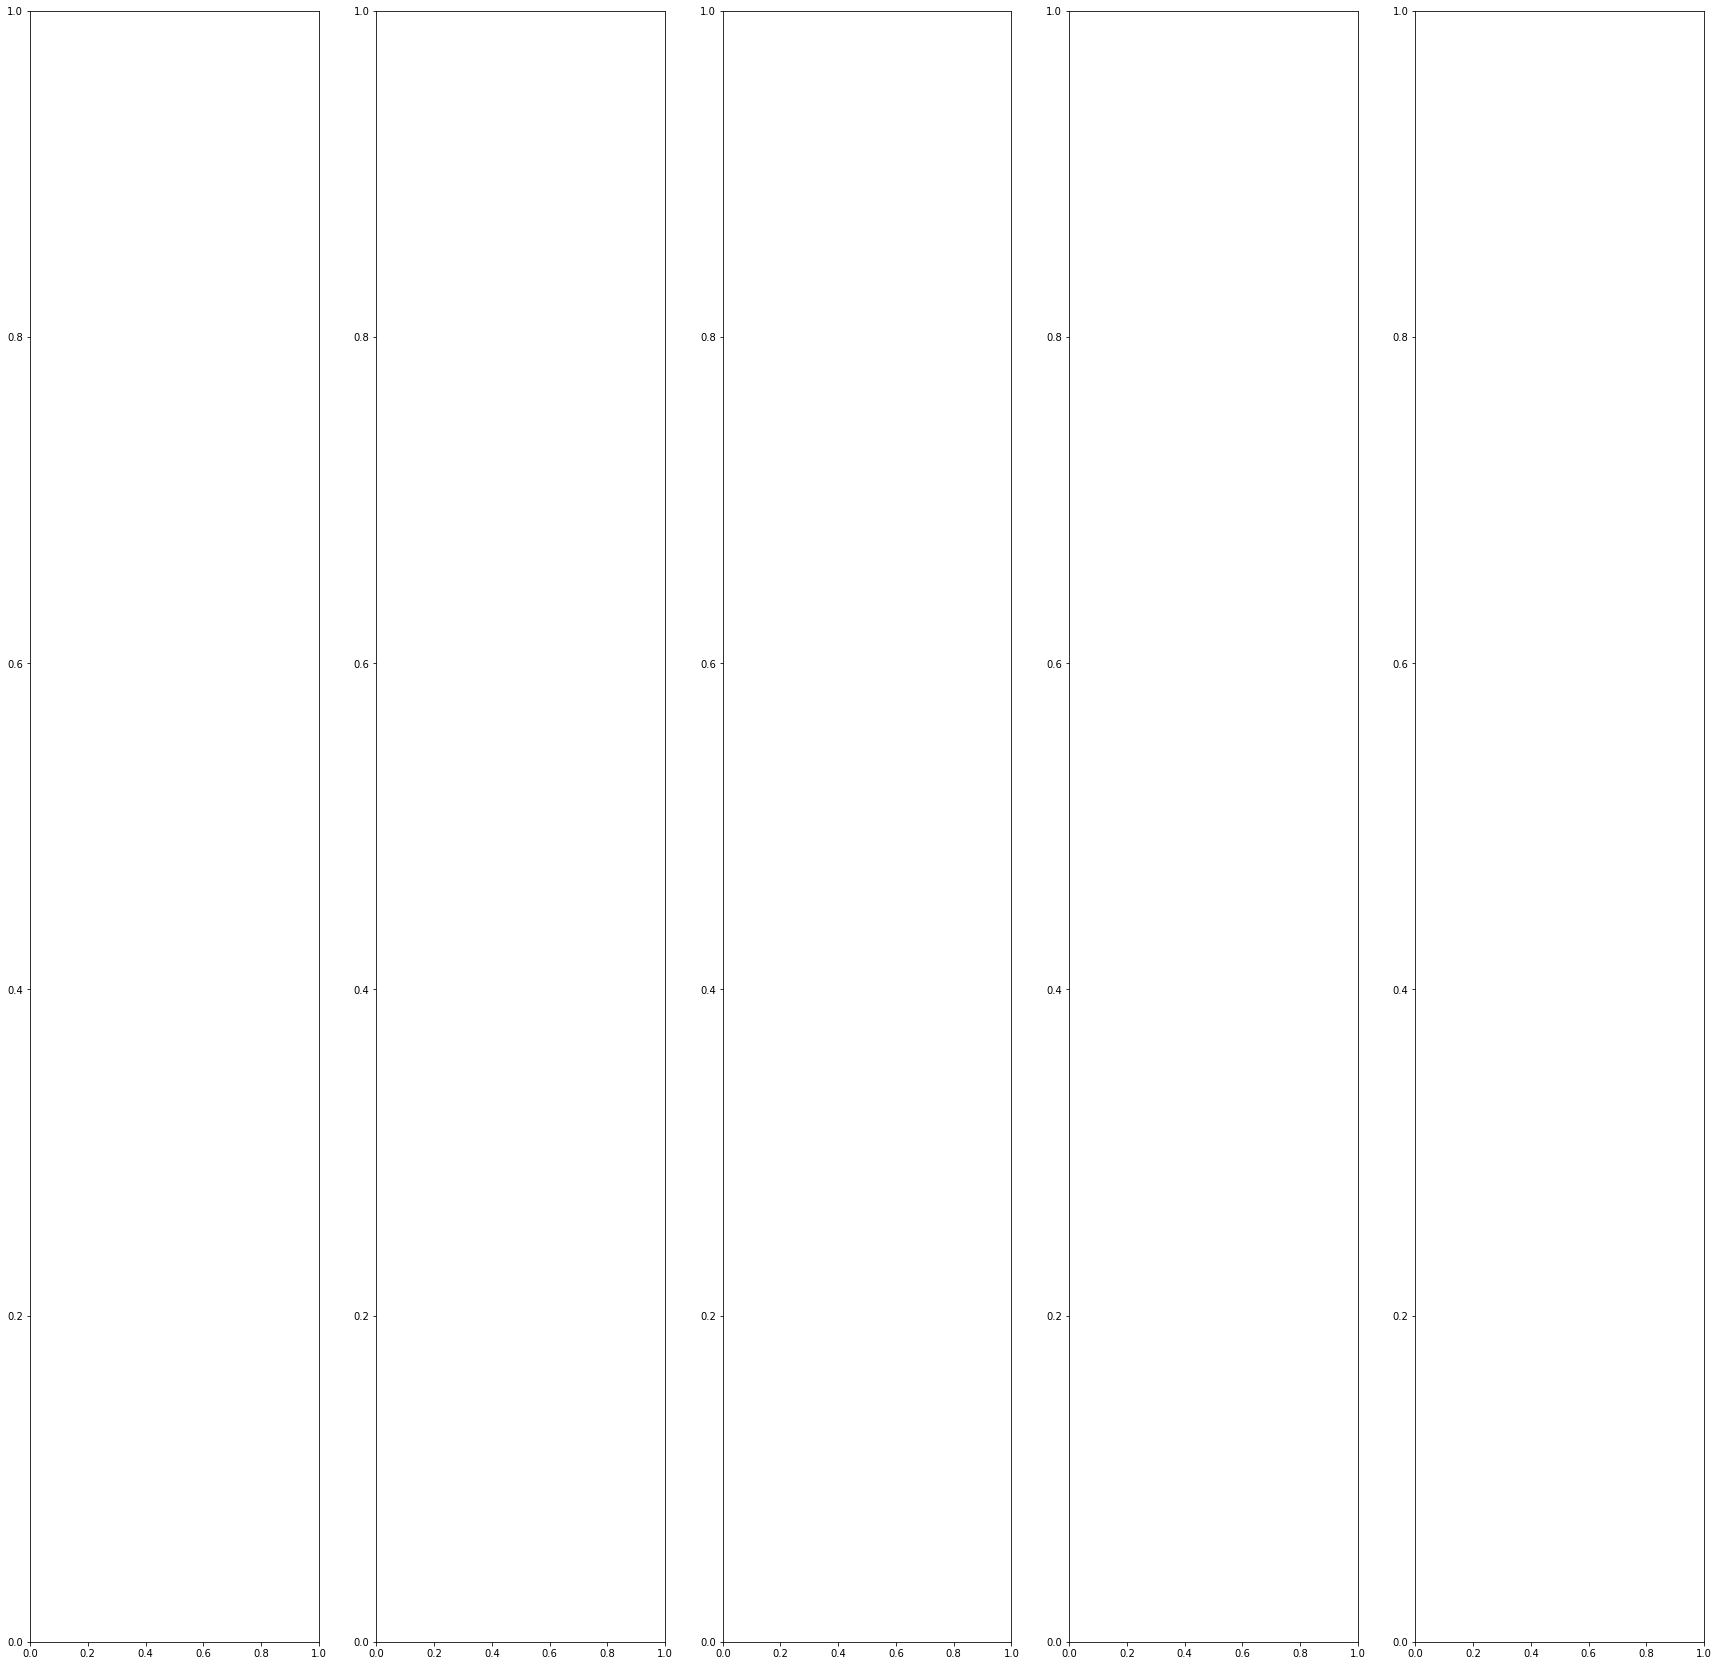

In [6]:
from scipy.signal import convolve2d
import numpy as np
import scipy.misc as misc
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1,5, figsize=(30,30))

img = misc.imread('dog.jpg')/255.-0.5
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original '+str(img.shape))

kernel = np.random.randn(3,3)
same1 = convolve2d(img, kernel, mode='same')
same1 = np.clip(same1, a_min=0.0, a_max=1.0)
ax[1].imshow(same1, cmap='gray')

kernel = np.random.randn(3,3)
print(kernel)
same2 = convolve2d(img, kernel, mode='same')
same2 = np.clip(same2, a_min=0.0, a_max=1.0)
ax[2].imshow(same2, cmap='gray')

kernel = np.random.randn(3,3)
same3 = convolve2d(img, kernel, mode='same')
same3 = np.clip(same3, a_min=0.0, a_max=1.0)
ax[3].imshow(same3, cmap='gray')

kernel = np.random.randn(3,3)
same4 = convolve2d(img, kernel, mode='same')
same4 = np.clip(same4, a_min=0.0, a_max=1.0)
ax[4].imshow(same4, cmap='gray')

plt.tight_layout()

## Problem 2: Running a Convolutional Neural Network
You will build and run a convolutional neural network.

### Important Instructions
* Put all code from parts A, B, and C into a single cell.  We should be able to copy that cell into a `.py` file and run it like a normal script.
* You may use a GPU to do part B (training the model).  Although this isn't required, it is recommended.
* You can use this as an opportunity to use a GPU instance on AWS.  Here are some instructions:
  - Go to AWS and Launch a new EC2 instance
  - Click on `Community AMIs` and in the search field type `Keras`
  - Select **Deep Learning AMI (Ubuntu) Version 17.0**
    * Note:  It's okay if you choose a different version, but I'd recommend using the latest version
  - In `Step 2: Choose an Instance Type` select a **g3.4xlarge** instance.
    * ![](figs/gpu_instance.png)
    * **IMPORTANT**: You may use a different GPU instance, but you **MUST** explicitely state which instance you are using.  If you don't tell us the exact instance you are using, we may not be able to reproduce your results and you will receive no credit on this problem.
  - When you get to `Step 6: Configure Security Group`, you have some decisions to make.
    * Option 1: Keep the default security group.  You will be able to launch the instance, `ssh` to it, and run jobs on it, but you won't be able to open a `Juptyer` notebook from the instance.
    * Option 2: Add a new security group like we did in Lab 3.  Be sure to follow the Lab3 instructions carefully!
  - Choose the correct authentication key and launch the instance!
* After you connect to your instance (via `ssh`) enter the following command:  `source activate tensorflow_p36`.  Now you will be in a virtual environment that has `Keras` with GPU support.  You're ready to go!
* If you want to launch a `Jupyter` notebook from the instance, you still have some more steps to complete.  Refer to the Lab3 instructions for details.

#### Additional Resources
Here are a few more `AWS` resources:
- [`AWS` and `Keras`](https://docs.aws.amazon.com/dlami/latest/devguide/tutorial-keras.html)
- [Using the Deep Learning `AMI` with `Conda`](https://docs.aws.amazon.com/dlami/latest/devguide/tutorial-conda.html)

There are many more resources out there.  If these aren't sufficient for you (and Lab3 doesn't help either), then you should try to search the web for more resources.


### Part A: Building the Model

In this first part, you will create a convolutional neural network using `Keras` to predict the type of object in an image. Load the [CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification) dataset, which contains 50,000 32x32 training images and 10,000 test images of the same size, with a total of 10 sizes.

Use a combination of the [following layers](https://keras.io/layers/convolutional/): Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order).
You may use an existing architecture like AlexNet or VGG16, or create one of your own design. However, you should write your own layers and not use a pre-written implementation.
To get you started, we have included a model with one convolutional layer.

Convolutional neural networks are very computationally intensive. We highly recommend that you train your model on using GPUs (using `JupyterHub` or `AWS`). On CPUs, this training can take up to several hours. On GPUs, it can be done within minutes.

#### Deliverables

1. **Print model.summary() and report the total number of parameters.**

2. **How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases?**
  - For instance, start by assigning 32 filters to each Conv2D layer, then 64, 128, etc. and recording the total number of parameters for each model.

3. **Generate a plot showing the relationship from question 2 and explain why.**
   - Note:  If you're developing your code on an `AWS` instance without `Jupyter` notebook, then you don't need to display the figure.  You can remove `plt.show()` at the end of you script.  When we run your script, we will be able to see your plot.

**Hint**: Each convolutional layer contains the following number of parameters:

$$
\text{# filters} \times \text{kernel width} \times \text{kernel height} \times \text{# input filters} + \text{# filters} \times 1 \text{(for the bias)}
$$

So for instance, let's say my first convolutional layer has 32 filters with 3x3 size kernels. The input tensor has 3 filters (one for each RGB color channel), so we have:

$$
\text{32 filters} \times \text{3 kernel width} \times \text{3 kernel height} \times \text{3 input filters} + \text{32 filters} \times 1 = 896 \text{ parameters}.
$$

### SOLUTION

In [ ]:
import keras
from keras.models import *
from keras.optimizers import *
from keras.layers import *

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
batch_size = 32
epochs=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

n_filters = 32
model = Sequential()
model.add(Conv2D(n_filters, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(n_filters, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#model = Model(inputs = input_layer, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

In [ ]:
x_train.shape[1:]

In [ ]:
filters = [32, 64, 128, 256]
params = [10144, 38720, 151168, 597248]
plt.plot(filters, params)

As we can see from this plot of 32, 64, 128, and 256 filters per layer, the total number of parameters increases exponentially with the number of filters.

### Part B: Training and Evaluating the Model
Now train your model. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs. Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes.

### SOLUTION

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

### Part C: Visualizing the Feature Maps

We would also like to examine the feature maps that are produced by the intermediate layers of the network.

**Using your model, extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid. Plot your original input image in a separte figure.**

You may use the following helper function `get_feature_maps()` to extract weights.

```python
def get_feature_maps(model, layer_id, input_image):
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))
```

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

image_id = 0
input_image = x_train[image_id,:,:,:]
maps = get_feature_maps(model, 2, input_image)[0:10]
plt.imshow(input_image)
f, ax = plt.subplots(3,3, figsize=(4,4))

for i, axis in enumerate(ax.ravel()):
    axis.imshow(maps[i], cmap='gray')
